In [1]:
##############################################
# Hardware
#    - Windows 11 
#    - NI USB-6008
#    Erst NI-DAQmx 19.5 installiert (aktuelle Version 2023 Q2 zeigt die Karte nicht an)
#    Dann nidaqmax installieren: "pip install nidaqmx" in Anaconda Prompt

import time as t
import numpy as np
import nidaqmx
from nidaqmx.constants import AcquisitionType
import pprint

fSampling = 10000 #Hz
nSamples = 1000 #samples
pp = pprint.PrettyPrinter(indent=4)
dtMax = 20 #sec

###############################################
# DAQ

data = []
t_insgesamt = 0

# config
with nidaqmx.Task() as task:
    t_vorher = t.time()    
    task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
    task.timing.cfg_samp_clk_timing(fSampling, sample_mode=AcquisitionType.CONTINUOUS)

    t_nachher = t.time()    
    while t_insgesamt < dtMax:
        value = task.read(number_of_samples_per_channel=nSamples)
        #t.sleep(1)
        data.extend(value)
        t_nachher = t.time()
        dt_buffer = t_nachher-t_vorher
        t_insgesamt += dt_buffer
        t_vorher = t_nachher
        #Verzögerungen haben keinen Einfluss auf die Messung! Super, hier der Beweis:        
        #print(dt_buffer)
        #pp.pprint(data)
###############################################
# output to file



In [7]:
print("Gesamte Messzeit [s]: " + str(t_insgesamt))
print("Anzahl aufgenommener Werte: " + str(len(data)))
print("Abtastfrequenz [Hz]: " + str(len(data) / t_insgesamt))

Gesamte Messzeit [s]: 20.0375018119812
Anzahl aufgenommener Werte: 200000
Abtastfrequenz [Hz]: 9981.28418785281


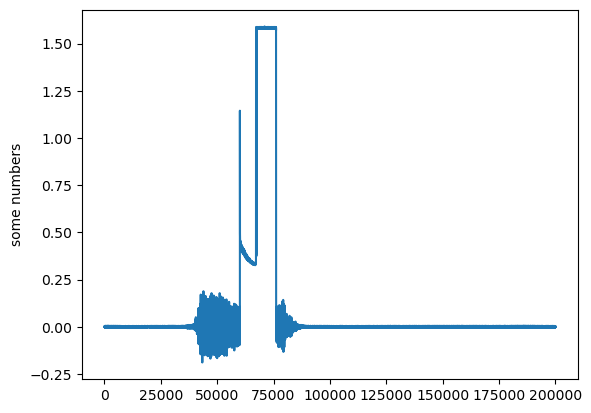

In [4]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.ylabel('some numbers')
plt.show()